# Assignment 2

Продемонстрировать положение No Free Lunch Theorem. (см материалы семинара)
Качество работы оценивается по accuracy на тестовой выборке согласно пайплайну (см материалы семинара). Метод валидации (если вы его применяете) 5-fold cv.
В выводе для каждой модели указать какие предположения она делает относительно данных. В выводе указать почему модель плохо / хорошо работает на сгенерированной вами выборке. Использовать пространство признаков размерности 2 при классификации и размерности 1 при регрессии. При возможности, нарисовать выборку на графике (цветами обозначить классы).

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей работает хуже, чем логистическая регрессия.


Для построения такого датасета, нам необходимо сделать так, чтобы классы было легко разделить прямой линией, но при этом расстояние между соседями этих классов было быльше, чем до представителей другого класса. Этого можно дабиться тем, что зададим распределение элементов линейной функцией.

In [760]:
import random
import pandas as pd
import warnings
import math
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline 

In [791]:
xs = []
ys = []
target = []

for num in range(1, 31, 3):
    ys += [2 * num, 2 * num + 2]
    xs += [num + 3, num]
    target += [1, 0]

In [792]:
X = pd.DataFrame({'X':xs,
                  'Y':ys})
y = pd.DataFrame({'Class':target})

In [793]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [764]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

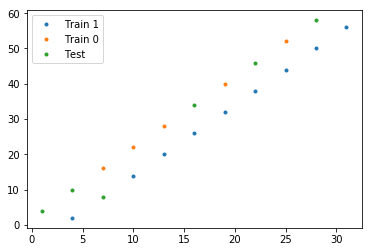

In [765]:
plt.plot(list(train.X[train.Class == 1]),
         list(train.Y[train.Class == 1]),
         '.',
         label='Train 1')
plt.plot(list(train.X[train.Class == 0]),
         list(train.Y[train.Class == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test.X),
         list(test.Y), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [766]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [767]:
KNC = KNeighborsClassifier()
LR = LogisticRegression()

In [768]:
KNC = KNeighborsClassifier()
KNC.fit(X=X_train,y=y_train)
cv_scores_KNC = cross_val_score(KNC, X, y, cv=5)
print('KNeighborsClassifier\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(KNC.score(X_test, y_test),
                                     cv_scores_KNC.mean(),
                                     cv_scores_KNC.std() * 2))

KNeighborsClassifier
Score: 0.16666666666666666
CV-Score: 0.8 (+/- 0.4898979485566356)


In [769]:
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
cv_scores_LR = cross_val_score(LR, X, y, cv=5)
print('LogisticRegression\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(LR.score(X_test, y_test),
                                     cv_scores_LR.mean(),
                                     cv_scores_LR.std() * 2))

LogisticRegression
Score: 1.0
CV-Score: 1.0 (+/- 0.0)


_______

#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором логистическая регрессия работает хуже, чем метод ближайших соседей.

Для этой задачи, нам необходимо сделать наоборот. Надо сделать такой датасет, который будет сложно поделить линейно, но при этом представители одного класса должны быть относительно близко, иначе метод ближайших соседей будет не сильно эффективен (Например для make_circles(noise=0.1, factor=0.9)).

In [770]:
from sklearn.datasets import make_circles

In [771]:
x_s, y_s = make_circles(noise=0.1, factor=0.2)

In [772]:
X_circles = pd.DataFrame(x_s)
y_circles = pd.DataFrame({'Target':y_s})

X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, test_size=0.3)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

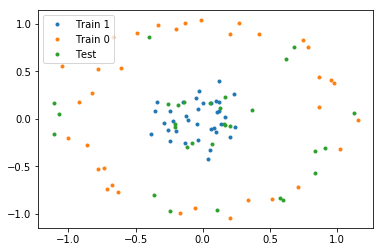

In [773]:
plt.plot(list(train[0][train.Target == 1]),
         list(train[1][train.Target == 1]),
         '.',
         label='Train 1')
plt.plot(list(train[0][train.Target == 0]),
         list(train[1][train.Target == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test[0]),
         list(test[1]), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [774]:
KNC = KNeighborsClassifier()
KNC.fit(X=X_train,y=y_train)
cv_scores_KNC = cross_val_score(KNC, X_circles, y_circles, cv=5)
print('KNeighborsClassifier\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(KNC.score(X_test, y_test),
                                     cv_scores_KNC.mean(),
                                     cv_scores_KNC.std() * 2))

KNeighborsClassifier
Score: 1.0
CV-Score: 1.0 (+/- 0.0)


In [775]:
LR = LogisticRegression()
LR.fit(X=X_train,y=y_train)
cv_scores_LR = cross_val_score(LR, X_circles, y_circles, cv=5)
print('LogisticRegression\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(LR.score(X_test, y_test),
                                     cv_scores_LR.mean(),
                                     cv_scores_LR.std() * 2))

LogisticRegression
Score: 0.4666666666666667
CV-Score: 0.36 (+/- 0.11661903789690603)


#### Сгенерировать датасет для задачи бинарной классификации (binary crossentropy), на котором метод ближайших соседей с косинусной метрикой расстояния работает лучше, чем с евклидовой метрикой.

Основная разница между двумя метриками заключаеьтся в том, что коссинусная метрика использует угол между двумя точками на плоскости, а евклидова метрика расстояние между этими точками. Поэтому, необходимо составить такой датасет, на котором расстояние между точками класса будет не таким показательным, как угол между ними.

In [844]:
xs = []
ys = []
target = []

for num in range(1, 1001, 100):
    ys += [10, 20]
    xs += [num + 50, num]
    target += [1, 0]

In [845]:
X = pd.DataFrame({'X':xs,
                  'Y':ys})
y = pd.DataFrame({'Class':target})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

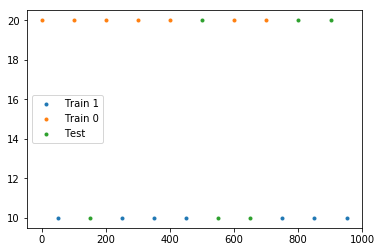

In [846]:
plt.plot(list(train.X[train.Class == 1]),
         list(train.Y[train.Class == 1]),
         '.',
         label='Train 1')
plt.plot(list(train.X[train.Class == 0]),
         list(train.Y[train.Class == 0]), 
         '.',
         label='Train 0')
plt.plot(list(test.X),
         list(test.Y), 
         '.',
         label='Test')
plt.legend()
plt.show()

In [847]:
from scipy.spatial.distance import cosine

In [848]:
KNC_euclidean = KNeighborsClassifier(metric='euclidean')
KNC_cd = KNeighborsClassifier(metric=cosine)

In [849]:
KNC_euclidean.fit(X=X_train,y=y_train)
cv_scores_KNC_eu = cross_val_score(KNC_euclidean, X, y, cv=5)
print('Euclidean metric\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})\n'.format(KNC_euclidean.score(X_test, y_test),
                                     cv_scores_KNC_eu.mean(),
                                     cv_scores_KNC_eu.std() * 2))

KNC_cd.fit(X=X_train,y=y_train)
cv_scores_KNC_cd = cross_val_score(KNC_cd, X, y, cv=5)
print('Cosin metric\n'\
      'Score: {}\n'\
      'CV-Score: {} (+/- {})'.format(KNC_cd.score(X_test, y_test),
                                     cv_scores_KNC_cd.mean(),
                                     cv_scores_KNC_cd.std() * 2))

Euclidean metric
Score: 0.3333333333333333
CV-Score: 0.8 (+/- 0.4898979485566356)

Cosin metric
Score: 0.5
CV-Score: 0.6 (+/- 0.2449489742783178)


Также сюда подходит датасет из первого задания.